In [37]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np

## Webscraping NBA Player Data

In [27]:
#Get initial NBA player data for year 2000-01
nba_data_url = "https://stats.nba.com/stats/leagueLeaders?LeagueID=00&PerMode=PerGame&Scope=S&Season=2000-01&SeasonType=Regular%20Season&StatCategory=PTS"
nba_data = requests.get(url=nba_data_url).json()
nba_headers = nba_data['resultSet']['headers'] 
nba_df = pd.DataFrame(nba_data['resultSet']['rowSet'], columns = nba_headers)
nba_df['YEAR'] = '2000-01'
nba_headers

#Get all Regular Season data for each player from the past 24 years
for i in range(2001,2024):
    start_year = i
    year = str(start_year)
    end_year = str(start_year+1)[-2:]
    data_new_url = "https://stats.nba.com/stats/leagueLeaders?LeagueID=00&PerMode=PerGame&Scope=S&Season=" + year + "-" + end_year + "&SeasonType=Regular%20Season&StatCategory=PTS"
    nba_new_data = requests.get(url=data_new_url).json()
    nba_new_table = pd.DataFrame(nba_new_data['resultSet']['rowSet'], columns = nba_headers)
    nba_new_table['YEAR'] = year + "-" + end_year
    nba_df = pd.concat([nba_df, nba_new_table])

nba_df

,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,OREB,DREB,REB,AST,STL,BLK,TOV,PTS,EFF,YEAR
0,947,1,Allen Iverson,1610612755,PHI,71,42.0,10.7,25.5,0.420,...,0.7,3.1,3.8,4.6,2.5,0.3,3.3,31.1,22.3,2000-01
1,711,2,Jerry Stackhouse,1610612765,DET,80,40.2,9.7,24.1,0.402,...,1.2,2.7,3.9,5.1,1.2,0.7,4.1,29.8,20.4,2000-01
2,406,3,Shaquille O'Neal,1610612747,LAL,74,39.5,11.0,19.2,0.572,...,3.9,8.8,12.7,3.7,0.6,2.8,2.9,28.7,31.0,2000-01
3,977,4,Kobe Bryant,1610612747,LAL,68,40.9,10.3,22.2,0.464,...,1.5,4.3,5.9,5.0,1.7,0.6,3.2,28.5,25.3,2000-01
4,1713,5,Vince Carter,1610612761,TOR,75,39.7,10.2,22.1,0.460,...,2.3,3.2,5.5,3.9,1.5,1.1,2.2,27.6,23.9,2000-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,1630231,236,KJ Martin,1610612755,PHI,60,12.5,1.6,3.0,0.536,...,0.7,1.5,2.2,0.9,0.4,0.2,0.5,3.7,5.1,2023-24
236,203939,237,Dwight Powell,1610612742,DAL,63,13.3,1.1,1.7,0.679,...,1.5,1.9,3.4,1.3,0.4,0.3,0.5,3.3,7.3,2023-24
237,1630192,238,Zeke Nnaji,1610612743,DEN,58,9.9,1.2,2.6,0.463,...,1.1,1.1,2.2,0.6,0.3,0.7,0.5,3.2,4.7,2023-24
238,1630550,239,JT Thor,1610612766,CHA,63,12.4,1.3,2.9,0.437,...,0.7,1.6,2.3,0.5,0.2,0.4,0.2,3.2,4.5,2023-24


## Data Cleaning and Transformation 

In [5]:
nba_data_clean = nba_df.drop(columns = ['PLAYER_ID', 'RANK', 'EFF'])
nba_data_clean['SS_YEAR'] = nba_data_clean['YEAR'].str[:4].astype(int)
nba_data_clean

,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,...,OREB,DREB,REB,AST,STL,BLK,TOV,PTS,YEAR,SS_YEAR
0,Allen Iverson,1610612755,PHI,71,42.0,10.7,25.5,0.420,1.4,4.3,...,0.7,3.1,3.8,4.6,2.5,0.3,3.3,31.1,2000-01,2000
1,Jerry Stackhouse,1610612765,DET,80,40.2,9.7,24.1,0.402,2.1,5.9,...,1.2,2.7,3.9,5.1,1.2,0.7,4.1,29.8,2000-01,2000
2,Shaquille O'Neal,1610612747,LAL,74,39.5,11.0,19.2,0.572,0.0,0.0,...,3.9,8.8,12.7,3.7,0.6,2.8,2.9,28.7,2000-01,2000
3,Kobe Bryant,1610612747,LAL,68,40.9,10.3,22.2,0.464,0.9,2.9,...,1.5,4.3,5.9,5.0,1.7,0.6,3.2,28.5,2000-01,2000
4,Vince Carter,1610612761,TOR,75,39.7,10.2,22.1,0.460,2.2,5.3,...,2.3,3.2,5.5,3.9,1.5,1.1,2.2,27.6,2000-01,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,KJ Martin,1610612755,PHI,60,12.5,1.6,3.0,0.536,0.1,0.5,...,0.7,1.5,2.2,0.9,0.4,0.2,0.5,3.7,2023-24,2023
236,Dwight Powell,1610612742,DAL,63,13.3,1.1,1.7,0.679,0.0,0.0,...,1.5,1.9,3.4,1.3,0.4,0.3,0.5,3.3,2023-24,2023
237,Zeke Nnaji,1610612743,DEN,58,9.9,1.2,2.6,0.463,0.1,0.4,...,1.1,1.1,2.2,0.6,0.3,0.7,0.5,3.2,2023-24,2023
238,JT Thor,1610612766,CHA,63,12.4,1.3,2.9,0.437,0.4,1.3,...,0.7,1.6,2.3,0.5,0.2,0.4,0.2,3.2,2023-24,2023


## Players Points Over the Past 10 Years of Current Players

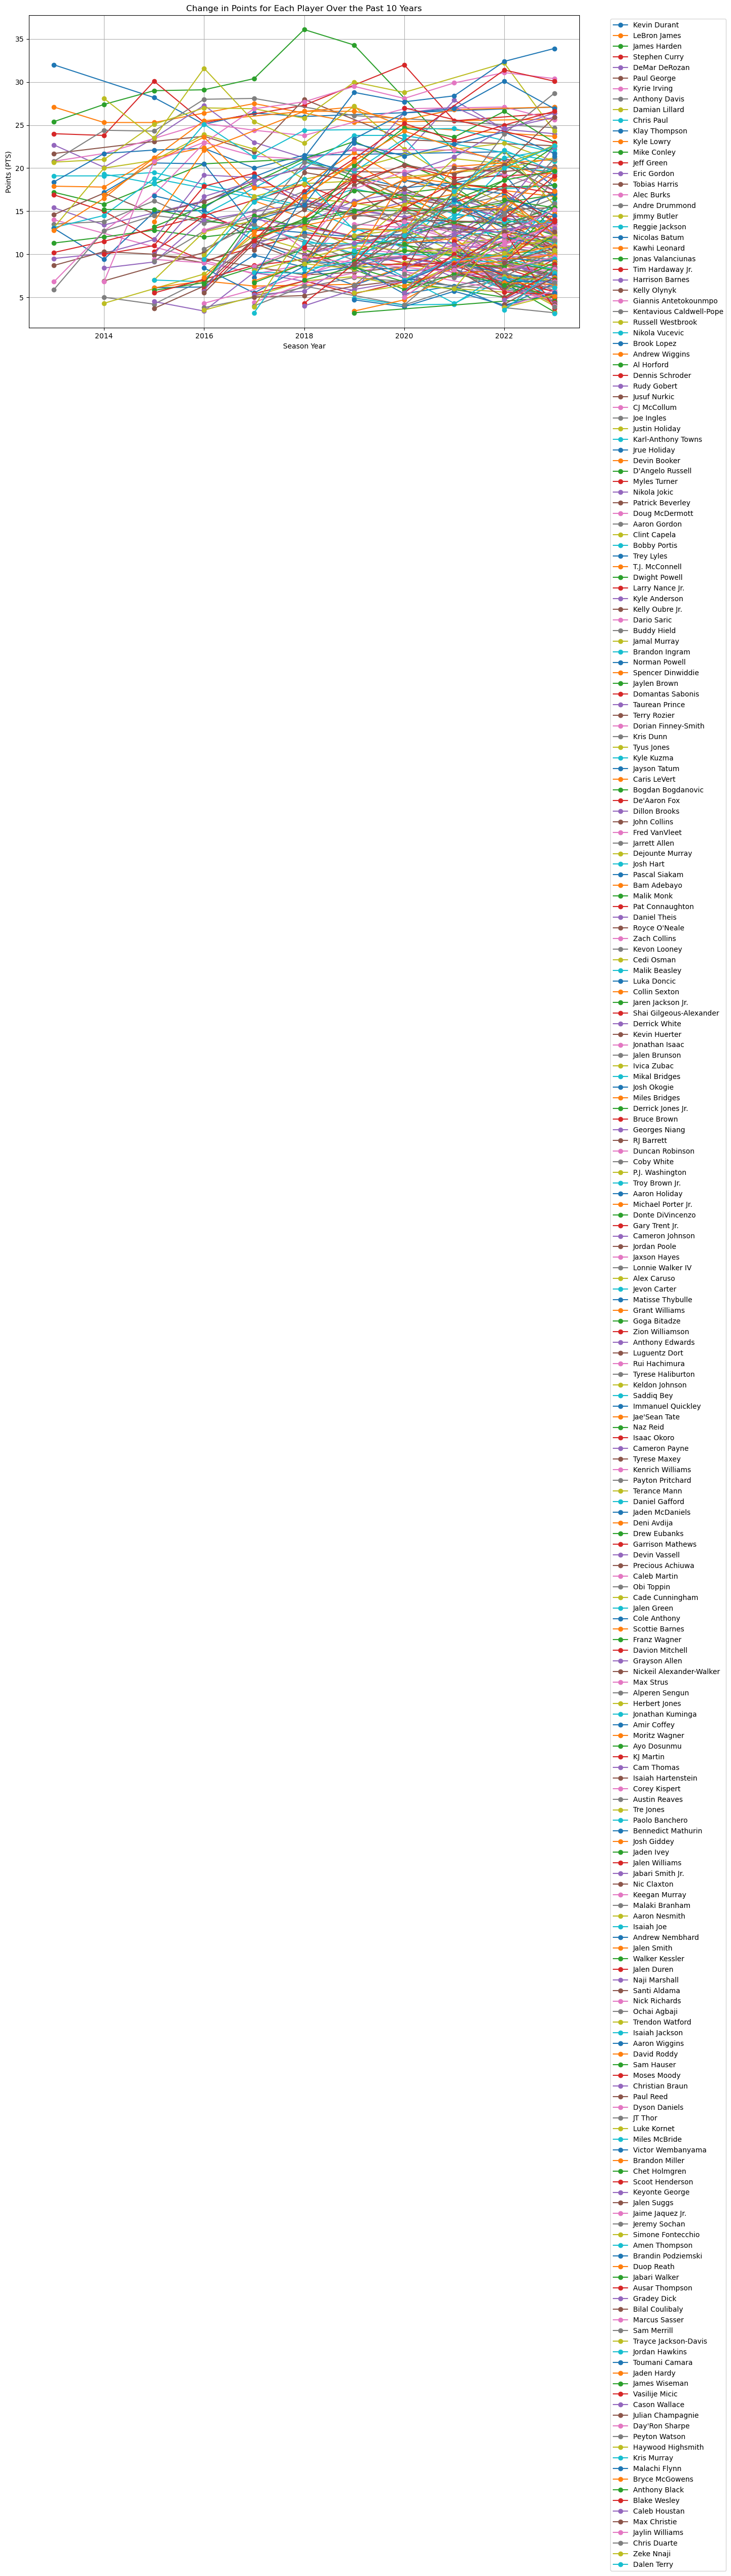

In [41]:
# Years
current_year = 2023
years_to_graph = list(range(current_year - 10, current_year + 1))
active_players = nba_data_clean[nba_data_clean['SS_YEAR'] == 2023]['PLAYER'].unique()

# Filter data
filtered_data = nba_data_clean[nba_data_clean['SS_YEAR'].isin(years_to_graph) & nba_data_clean['PLAYER'].isin(active_players)]

# Plot points for each player
players = filtered_data['PLAYER'].unique()
plt.figure(figsize=(14,8))

for player in players:
    player_data = filtered_data[filtered_data['PLAYER'] == player]
    plt.plot(player_data['SS_YEAR'], player_data['PTS'], marker = 'o', label = player)
    
plt.xlabel('Season Year')
plt.ylabel('Points (PTS)')
plt.title('Change in Points for Each Player Over the Past 10 Years')
plt.legend(bbox_to_anchor=(1.05, 1), loc = 'upper left')
plt.grid(True)
plt.show()

## Radar Chart of Each Player in the 2023-2024 Season

In [39]:


categories = ['Scoring (Points)','Efficiency (Shooting %)','3-Pointers',
              'Playmaking (Assists)', 'Open Court Defense (Steals)', 'At Rim Defense (Blocks)', 'Rebounding (Reounds)']
# Players in 2023-2024 Season
active_players = nba_data_clean[nba_data_clean['SS_YEAR'] == 2023]['PLAYER'].unique()

# Filter data
radar_data = nba_data_clean[nba_data_clean['PLAYER'].isin(active_players)]

players = radar_data['PLAYER'].unique()

# Category data
all_pts = radar_data['PTS'].tolist()
all_fgp = radar_data['FG_PCT'].tolist()
all_fg3 = radar_data['FG3M'].tolist()
all_ast = radar_data['AST'].tolist()
all_stl = radar_data['STL'].tolist()
all_blk = radar_data['BLK'].tolist()
all_reb = radar_data['REB'].tolist()

def calculate_percentile(data, value):
    # Convert data to a numpy array
    data = np.array(data)
    
    # Sort the data
    sorted_data = np.sort(data)
    
    # Calculate the number of data points below the given value
    B = np.sum(sorted_data < value)
    
    # Calculate the number of data points equal to the given value
    E = np.sum(sorted_data == value)
    
    # Calculate the total number of data points
    N = len(sorted_data)
    
    # Calculate the percentile
    percentile = ((B + 0.5 * E) / N) * 100
    
    return percentile


fig = go.Figure()

for player in players:
    player_data = radar_data[radar_data['PLAYER'] == player].iloc[-1]
    
    fig.add_trace(go.Scatterpolar(
      r=[calculate_percentile(all_pts, player_data['PTS']), 
         calculate_percentile(all_fgp, player_data['FG_PCT']), 
         calculate_percentile(all_fg3, player_data['FG3M']), 
         calculate_percentile(all_ast, player_data['AST']), 
         calculate_percentile(all_stl, player_data['STL']), 
         calculate_percentile(all_blk, player_data['BLK']), 
         calculate_percentile(all_reb, player_data['REB'])],
      theta=categories,
      fill='toself',
      name=player
    ))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 100]
    )),
  showlegend=False
)

fig.show()